## Skill Activity Number : 4

### Title: Perform Clustering on the Crime Dataset
### Problem Statement:
#### Perform Clustering for the crime data and identify the number of clusters formed and draw inferences.

### Skills/Competencies to be acquired:
#### To gain an understanding of data , find clues from the data,How to play with data.

### Coding for best model.

#### To check the quality of data for further processing and cleaning if necessary.

#### To check for anomalies or outliers that may impact model.

### Model Training on different classification models with different different combinations to get the best classification model.

### 1.What is the purpose of this activity?
#### 1)Preview data.
#### 2)Check total number of entries and column types.
#### 3)Check any null values.
#### 5)Check and remove/clipped outliers.
#### 7)Perform different clustering models for getting better prediction of crime data.
  
### 2.Steps performed in this activity.
#### 1)Checking data information.
#### 2)Checking Missing values,duplicate values,outliers.
#### 3)Implementation KMeans Clustering.
#### 4)Hierarchical Agglomeritve Clustering
#### 5)DBSCAN 
#### 6)Conclusion.

### 3.What resources / materials / equipment / tools did you use for this activity?
#### 1)Anaconda Jupyter Notebook
#### 2)Some previous Study Material for reference.

### 4.What skills did you acquire?
#### 2)How to handle Outliers,missing values,Duplicate values.
#### 4)How to compare evaluation part that is classification report.

### 5.Time taken to complete the activity?
#### 4 to 5 hrs.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv("../data/crime_data.csv")
df.head()

,Name,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


In [3]:
df.shape

(50, 5)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      50 non-null     object 
 1   Murder    50 non-null     float64
 2   Assault   50 non-null     int64  
 3   UrbanPop  50 non-null     int64  
 4   Rape      50 non-null     float64
dtypes: float64(2), int64(2), object(1)
memory usage: 2.1+ KB


In [5]:
df.dtypes

Name         object
Murder      float64
Assault       int64
UrbanPop      int64
Rape        float64
dtype: object

In [6]:
df.describe()

,Murder,Assault,UrbanPop,Rape
count,50.00000,50.000000,50.000000,50.000000
mean,7.78800,170.760000,65.540000,21.232000
std,4.35551,83.337661,14.474763,9.366385
min,0.80000,45.000000,32.000000,7.300000
25%,4.07500,109.000000,54.500000,15.075000
50%,7.25000,159.000000,66.000000,20.100000
75%,11.25000,249.000000,77.750000,26.175000
max,17.40000,337.000000,91.000000,46.000000


## Exploratory Data Analysis

In [7]:
# Checking null values.
df.isna().sum()

Name        0
Murder      0
Assault     0
UrbanPop    0
Rape        0
dtype: int64

#### There is no null values in data.

In [8]:
# Checking Duplicate values.
df.duplicated().sum()

0

#### There is no dublicated values in data.

<AxesSubplot:>

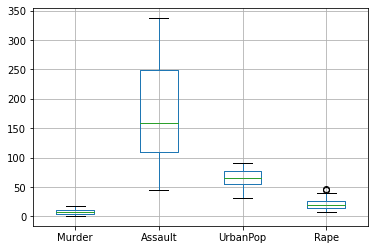

In [9]:
## Checking Outliers by using boxplot
df.boxplot()

#### There is no outlier in data.

In [10]:
## Checking Co-relation
df.corr()

,Murder,Assault,UrbanPop,Rape
Murder,1.000000,0.801873,0.069573,0.563579
Assault,0.801873,1.000000,0.258872,0.665241
UrbanPop,0.069573,0.258872,1.000000,0.411341
Rape,0.563579,0.665241,0.411341,1.000000


<AxesSubplot:>

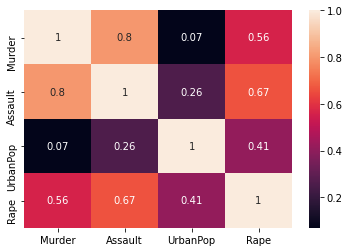

In [11]:
sns.heatmap(df.corr(),annot=True)

#### There is strong relationship in between Assault and Murder , Assault and Rape.

In [12]:
df=df.drop(columns="Name")
df.head()

,Murder,Assault,UrbanPop,Rape
0,13.2,236,58,21.2
1,10.0,263,48,44.5
2,8.1,294,80,31.0
3,8.8,190,50,19.5
4,9.0,276,91,40.6


## KMeans Clustering

In [13]:
from sklearn.cluster import KMeans

### Elbow Method

In [14]:
k=range(1,11)
ssd=[]
for i in k:
    model=KMeans(n_clusters=i)
    model.fit(df)
    ssd.append(model.inertia_)

### Elbow Plot

([<matplotlib.axis.XTick at 0x1ada4c01a60>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

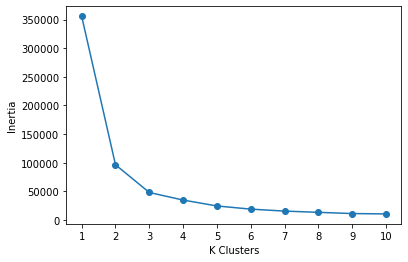

In [15]:
plt.plot(k,ssd, marker='o')
plt.xlabel('K Clusters')
plt.ylabel('Inertia')
plt.xticks(k)

In [16]:
# 5 is selected as the optimal k value

In [17]:
model=KMeans(n_clusters=5)
model.fit(df)

KMeans(n_clusters=5)

In [18]:
model.labels_

array([0, 0, 4, 3, 0, 3, 1, 0, 4, 3, 2, 1, 0, 1, 2, 1, 1, 0, 2, 4, 3, 0,
       2, 0, 3, 1, 1, 0, 2, 3, 0, 0, 4, 2, 1, 3, 3, 1, 3, 0, 2, 3, 3, 1,
       2, 3, 3, 2, 2, 3])

In [19]:
model.n_iter_

7

In [20]:
output=df
output['Crime_groups']=model.labels_

In [21]:
output

,Murder,Assault,UrbanPop,Rape,Crime_groups
0,13.2,236,58,21.2,0
1,10.0,263,48,44.5,0
2,8.1,294,80,31.0,4
3,8.8,190,50,19.5,3
4,9.0,276,91,40.6,0
5,7.9,204,78,38.7,3
6,3.3,110,77,11.1,1
7,5.9,238,72,15.8,0
8,15.4,335,80,31.9,4
9,17.4,211,60,25.8,3


### Selecting two important features for visualization of the cluster
#### Murder and Rape are two important Features



In [22]:
df1=df[["Murder","Rape"]]

([<matplotlib.axis.XTick at 0x1ada54e7ac0>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

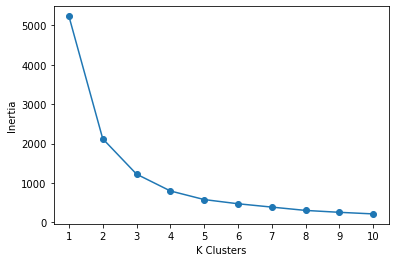

In [23]:
k=range(1,11)
ssd=[]
for i in k:
    model=KMeans(n_clusters=i)
    model.fit(df1)
    ssd.append(model.inertia_)
plt.plot(k,ssd, marker='o')
plt.xlabel('K Clusters')
plt.ylabel('Inertia')
plt.xticks(k)

In [24]:
model=KMeans(n_clusters=5)
model.fit(df1)

KMeans(n_clusters=5)

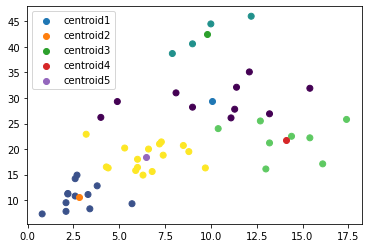

In [25]:
plt.scatter(df1.iloc[:,0],df1.iloc[:,1],c=model.labels_)
centroid=model.cluster_centers_
for i in range(len(centroid)):
    plt.scatter(centroid[i][0],centroid[i][1],label="centroid"+str(i+1))
plt.legend()

## Hierarchical Agglomeritve Clustering

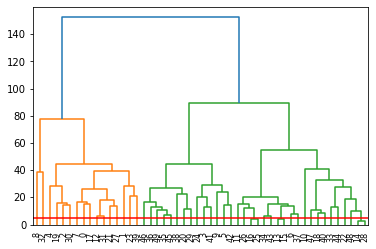

In [26]:
from scipy.cluster import hierarchy
den=hierarchy.dendrogram(hierarchy.linkage(df,method='average'))
plt.axhline(y=5,color='r')

In [27]:
Output=df
Output["2 cluster Label"]=model.labels_

In [28]:
Output

,Murder,Assault,UrbanPop,Rape,Crime_groups,2 cluster Label
0,13.2,236,58,21.2,0,3
1,10.0,263,48,44.5,0,2
2,8.1,294,80,31.0,4,0
3,8.8,190,50,19.5,3,4
4,9.0,276,91,40.6,0,2
5,7.9,204,78,38.7,3,2
6,3.3,110,77,11.1,1,1
7,5.9,238,72,15.8,0,4
8,15.4,335,80,31.9,4,0
9,17.4,211,60,25.8,3,3


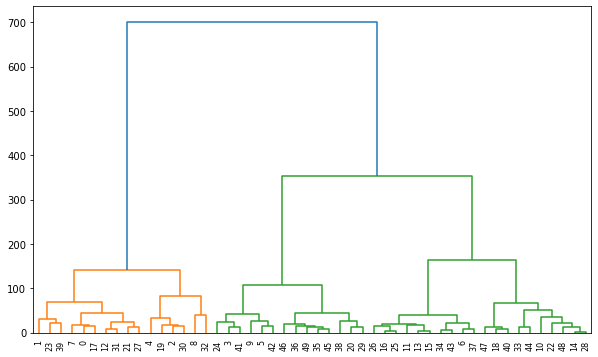

In [29]:
from scipy.cluster import hierarchy
fig=plt.figure(figsize=(10,6))
den=hierarchy.dendrogram(hierarchy.linkage(df,method='ward'))

In [30]:
Output=df
Output["3 cluster Label"]=model.labels_

In [31]:
Output

,Murder,Assault,UrbanPop,Rape,Crime_groups,2 cluster Label,3 cluster Label
0,13.2,236,58,21.2,0,3,3
1,10.0,263,48,44.5,0,2,2
2,8.1,294,80,31.0,4,0,0
3,8.8,190,50,19.5,3,4,4
4,9.0,276,91,40.6,0,2,2
5,7.9,204,78,38.7,3,2,2
6,3.3,110,77,11.1,1,1,1
7,5.9,238,72,15.8,0,4,4
8,15.4,335,80,31.9,4,0,0
9,17.4,211,60,25.8,3,3,3


## DBSCAN

In [32]:
from sklearn.cluster import AgglomerativeClustering
model=AgglomerativeClustering(n_clusters=4)
model.fit(df)

AgglomerativeClustering(n_clusters=4)

In [33]:
model.labels_

array([0, 0, 0, 2, 0, 2, 3, 0, 0, 2, 1, 3, 0, 3, 1, 3, 3, 0, 1, 0, 2, 0,
       1, 0, 2, 3, 3, 0, 1, 2, 0, 0, 0, 1, 3, 2, 2, 3, 2, 0, 1, 2, 2, 3,
       1, 2, 2, 1, 1, 2], dtype=int64)

In [34]:
Output=df
Output['Crime_groups_1']=model.labels_

In [35]:
Output

,Murder,Assault,UrbanPop,Rape,Crime_groups,2 cluster Label,3 cluster Label,Crime_groups_1
0,13.2,236,58,21.2,0,3,3,0
1,10.0,263,48,44.5,0,2,2,0
2,8.1,294,80,31.0,4,0,0,0
3,8.8,190,50,19.5,3,4,4,2
4,9.0,276,91,40.6,0,2,2,0
5,7.9,204,78,38.7,3,2,2,2
6,3.3,110,77,11.1,1,1,1,3
7,5.9,238,72,15.8,0,4,4,0
8,15.4,335,80,31.9,4,0,0,0
9,17.4,211,60,25.8,3,3,3,2


In [36]:
from sklearn.neighbors import NearestNeighbors
neigh = NearestNeighbors(n_neighbors=2)
nbrs = neigh.fit(df)
distances, indices = nbrs.kneighbors(df)

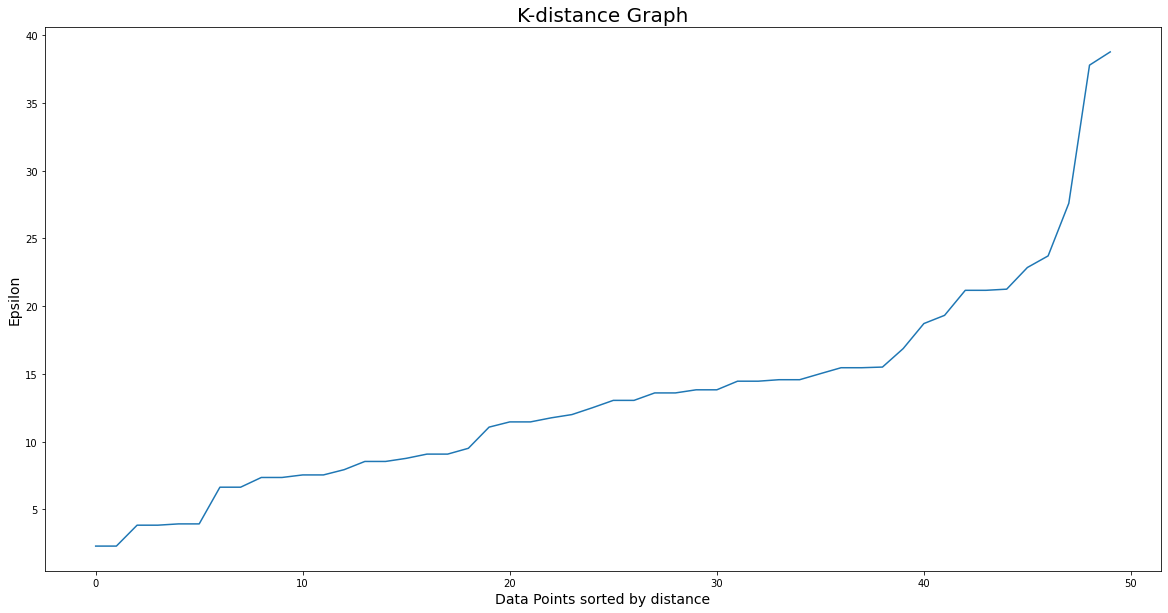

In [37]:
plt.figure(figsize=(20,10))
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.plot(distances)
plt.title('K-distance Graph',fontsize=20)
plt.xlabel('Data Points sorted by distance',fontsize=14)
plt.ylabel('Epsilon',fontsize=14)
plt.show()

In [38]:
from sklearn.cluster import DBSCAN
model=DBSCAN(eps=30,min_samples=6)
model.fit(df)

DBSCAN(eps=30, min_samples=6)

In [39]:
model.labels_

array([ 0,  0,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1,  0,
        0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
      dtype=int64)

In [40]:
output=df
output['Crime_groups']=model.labels_

In [41]:
output

,Murder,Assault,UrbanPop,Rape,Crime_groups,2 cluster Label,3 cluster Label,Crime_groups_1
0,13.2,236,58,21.2,0,3,3,0
1,10.0,263,48,44.5,0,2,2,0
2,8.1,294,80,31.0,0,0,0,0
3,8.8,190,50,19.5,0,4,4,2
4,9.0,276,91,40.6,0,2,2,0
5,7.9,204,78,38.7,0,2,2,2
6,3.3,110,77,11.1,0,1,1,3
7,5.9,238,72,15.8,0,4,4,0
8,15.4,335,80,31.9,-1,0,0,0
9,17.4,211,60,25.8,0,3,3,2


In [42]:
df.columns 

Index(['Murder', 'Assault', 'UrbanPop', 'Rape', 'Crime_groups',
       '2 cluster Label', '3 cluster Label', 'Crime_groups_1'],
      dtype='object')

Text(0.5, 1.0, 'Murder vs Rape')

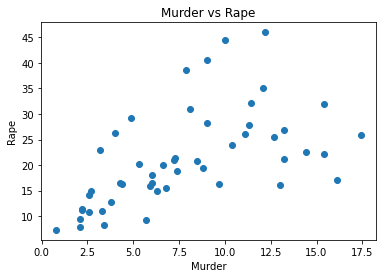

In [43]:
plt.scatter(df['Murder'], df['Rape'])
plt.xlabel("Murder")
plt.ylabel("Rape")
plt.title("Murder vs Rape")

###  Conclusion : First 2 method gives goods clustering result as compare to DBSCAN.